# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [13]:
# Difference in stock price
df["diff"] = df["Adj Close"].diff().shift(-1)

# Target up or down
df["Target"] = np.sign(df["diff"])

# Option premium
df["Premium"] = .08*df["Adj Close"]

# 3.) Pull in X data and build a LogReg on column 2

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [15]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [20]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[:"2023-09-30",:].copy()

In [21]:
logreg = LogisticRegression()

logreg.fit(X,y)

y_pred = logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [23]:
df["Predictions"] = y_pred

In [28]:
df["Profits"] = 0

# True positives
df.loc[(df["Predictions"]==1) & (df["Target"]==1),"Profits"] = df["Premium"]

# False positives
df.loc[(df["Predictions"]==1) & (df["Target"]== -1),"Profits"] = 100*df["diff"] + df["Premium"]

# True Negatives

# True positives

# 5.) Plot profits over time

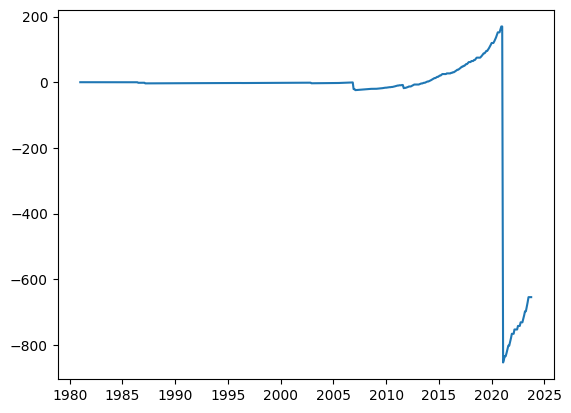

In [29]:
plt.plot(np.cumsum(df["Profits"]))
plt.show()

COVID

5.5.) Your skills from the MQE to help Mr. Liu's ventures:
Quantitative skills to deal with data, ability to work in a team, insights about the economy, and the ability to learn new knowledge continuously and overcome difficulties.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.